In [1]:
import os
os.getcwd()

'C:\\Users\\AJ'

In [35]:
import pandas as pd
import numpy  as np
from csv import writer
from csv import reader

In [36]:
df=pd.read_csv("turbo.csv")

In [51]:
df

,Weight,Spring Load,Speed,P1,P2,Pi,Discharge_Q,X
0,5,0.2,460,1.8,1.7,1.2,0.1,0.1
1,4,0.2,460,2.1,1.9,1.5,0.2,0.2
2,3,0.2,460,2.3,2.1,1.7,0.2,0.2
3,2,0.2,460,2.5,2.3,1.9,0.2,0.2
4,1,0.2,460,2.7,2.5,2.1,0.2,0.2
5,1,0.2,920,1.2,0.3,0.8,0.9,0.9
6,2,0.2,830,1.7,1.6,1.2,0.1,0.1
7,3,0.2,730,1.4,0.9,1.1,0.5,0.5
8,4,0.2,620,1.5,1.0,1.2,0.5,0.5
9,5,0.2,460,1.8,1.7,1.2,0.1,0.1


In [30]:
#df.describe()   #Q =0.0032(10*(P1-P2))**0.5

In [62]:
#Discharge_Q =0.0032(10*(P1-P2))**0.5
#Head_H=10*Pi
#InputPower_IP = 1000*9.81*Q*H
#OutPutPower_OP=((2*3.14*Speed*(Weight+1-Spring))*(9.81*0.1075))/60
#Efficiency    = OutPutPower_OP/InputPower_IP
#unitSpeed_US  = Speed/(Head_H**0.5)
#UnitPower_UP=OutPutPower_OP/(Head_H**1.5)

In [ ]:
#1.Unit Power Vs Unit Speed
#2.Efficiency Vs Unit Speed

In [120]:
df["Discharge_Q"] =  (0.0032*(10*(df["P1"]-df["P2"])))**0.5
df["Head_H"]=10*df["Pi"]
df['InputPower_IP'] =1000*9.81*df["Discharge_Q"]*df["Head_H"]
df["OutPutPower_OP"]=((2*3.14*df['Speed']*(df['Weight']+1-df['Spring Load']))*(9.81*0.1075))/60
df["Efficiency"]    = 100* (df["OutPutPower_OP"]/df["InputPower_IP"])
df["unitSpeed_US"]  = df['Speed']/(df["Head_H"]**0.5)
df["UnitPower_Up"]=df["OutPutPower_OP"]/(df["Head_H"]**1.5)
#df.drop('X', inplace=True, axis=1)
df

,Weight,Spring Load,Speed,P1,P2,Pi,Discharge_Q,Head_H,InputPower_IP,OutPutPower_OP,Efficiency,unitSpeed_US,UnitPower_Up
0,5,0.2,460,1.8,1.7,1.2,0.056569,12.0,6659.248823,294.490772,4.422282,132.790562,7.084347
1,4,0.2,460,2.1,1.9,1.5,0.080000,15.0,11772.000000,243.716501,2.070307,118.771489,4.195155
2,3,0.2,460,2.3,2.1,1.7,0.080000,17.0,13341.600000,192.942230,1.446170,111.566388,2.752668
3,2,0.2,460,2.5,2.3,1.9,0.080000,19.0,14911.200000,142.167959,0.953431,105.531238,1.716609
4,1,0.2,460,2.7,2.5,2.1,0.080000,21.0,16480.800000,91.393688,0.554546,100.380230,0.949702
5,1,0.2,920,1.2,0.3,0.8,0.169706,8.0,13318.497645,182.787376,1.372432,325.269119,8.078137
6,2,0.2,830,1.7,1.6,1.2,0.056569,12.0,6659.248823,256.520447,3.852093,239.600362,6.170923
7,3,0.2,730,1.4,0.9,1.1,0.126491,11.0,13649.655292,306.190930,2.243214,220.103282,8.392731
8,4,0.2,620,1.5,1.0,1.2,0.126491,12.0,14890.533046,328.487458,2.206015,178.978583,7.902180
9,5,0.2,460,1.8,1.7,1.2,0.056569,12.0,6659.248823,294.490772,4.422282,132.790562,7.084347


In [85]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

Text(0.5, 1.0, 'CHAR.CURVE')

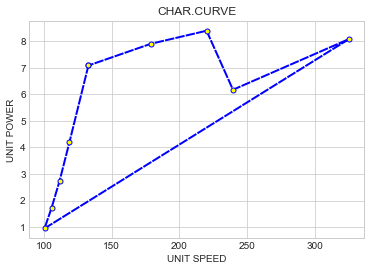

In [102]:
plt.plot(df["unitSpeed_US"],df["UnitPower_Up"], color='blue', linestyle='dashed', dash_capstyle="projecting",linewidth = 2, marker='.', markerfacecolor='yellow', markersize=10)
plt.xlabel('UNIT SPEED') 
# naming the y axis 
plt.ylabel('UNIT POWER') 
# giving a title to my graph 
plt.title('CHAR.CURVE')

Text(0.5, 1.0, 'CHARARECTERISTICS CURVE')

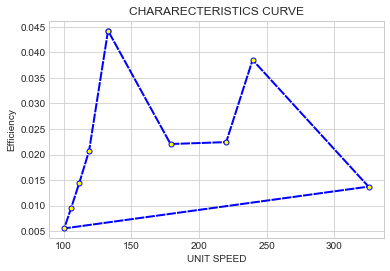

In [106]:
plt.plot(df["unitSpeed_US"],df["Efficiency"], color='blue', linestyle='dashed', dash_capstyle="projecting",linewidth = 2, marker='.', markerfacecolor='yellow', markersize=10)
plt.xlabel('UNIT SPEED') 
# naming the y axis 
plt.ylabel('Efficiency') 
# giving a title to my graph 
plt.title('CHARARECTERISTICS CURVE')

Text(0.5, 1.0, 'CHAR.CURVE')

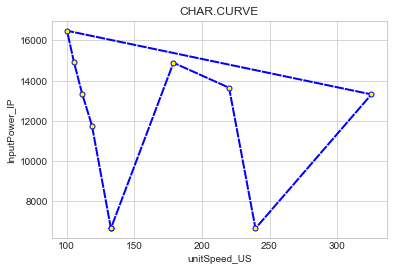

In [111]:
plt.plot(df["unitSpeed_US"],df["InputPower_IP"], color='blue', linestyle='dashed', dash_capstyle="projecting",linewidth = 2, marker='.', markerfacecolor='yellow', markersize=10)
plt.xlabel("unitSpeed_US") 
# naming the y axis 
plt.ylabel('InputPower_IP') 
# giving a title to my graph 
plt.title('CHAR.CURVE')

Text(0.5, 1.0, 'CHAR.CURVE')

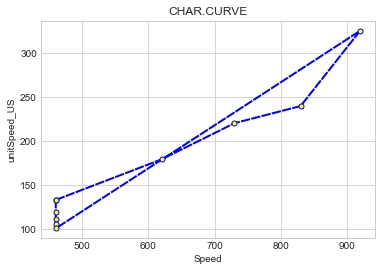

In [115]:
plt.plot(df["Speed"],df["unitSpeed_US"], color='blue', linestyle='dashed', dash_capstyle="projecting",linewidth = 2, marker='.', markerfacecolor='yellow', markersize=10)
plt.xlabel('Speed') 
# naming the y axis 
plt.ylabel("unitSpeed_US") 
# giving a title to my graph 
plt.title('CHAR.CURVE')

Text(0.5, 1.0, 'CHAR.CURVE')

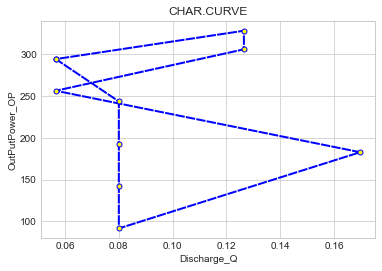

In [117]:
plt.plot(df["Discharge_Q"],df["OutPutPower_OP"], color='blue', linestyle='dashed', dash_capstyle="projecting",linewidth = 2, marker='.', markerfacecolor='yellow', markersize=10)
plt.xlabel('Discharge_Q') 
# naming the y axis 
plt.ylabel("OutPutPower_OP") 
# giving a title to my graph 
plt.title('CHAR.CURVE')

Text(0.5, 1.0, 'CHAR.CURVE')

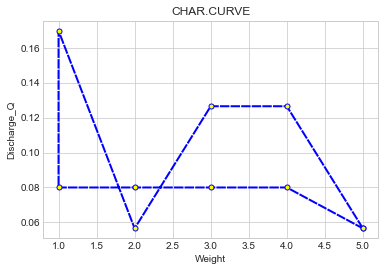

In [119]:

plt.plot(df["Weight"],df["Discharge_Q"], color='blue', linestyle='dashed', dash_capstyle="projecting",linewidth = 2, marker='.', markerfacecolor='yellow', markersize=10)
plt.xlabel('Weight') 
# naming the y axis 
plt.ylabel("Discharge_Q") 
# giving a title to my graph 
plt.title('CHAR.CURVE')